# Minimum spanning tree (MST) of IZA zeolites

In this notebook, we will create the MST of IZA zeolites based on their AMD. The code to calculate the AMD is provided.

In [2]:
import os
import math
import pickle
import itertools
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rcParams['svg.fonttype'] = 'none'

## Plotting the graph

In [3]:
dm = pd.read_csv("../data/iza_dm.csv", index_col=0)

In [4]:
def get_mst(distance_matrix):
    from scipy.spatial.distance import squareform, pdist
    
    graph = nx.Graph()

    graph.add_weighted_edges_from(
        (i1, i2, d) for (i1, i2), d in zip(itertools.combinations(range(len(dm)), 2), squareform(dm.values))
    )
    _attrs = {i: z for i, z in enumerate(dm.index)}
    nx.set_node_attributes(graph, _attrs, "zeo")

    return nx.minimum_spanning_tree(graph)

G = get_mst(dm)

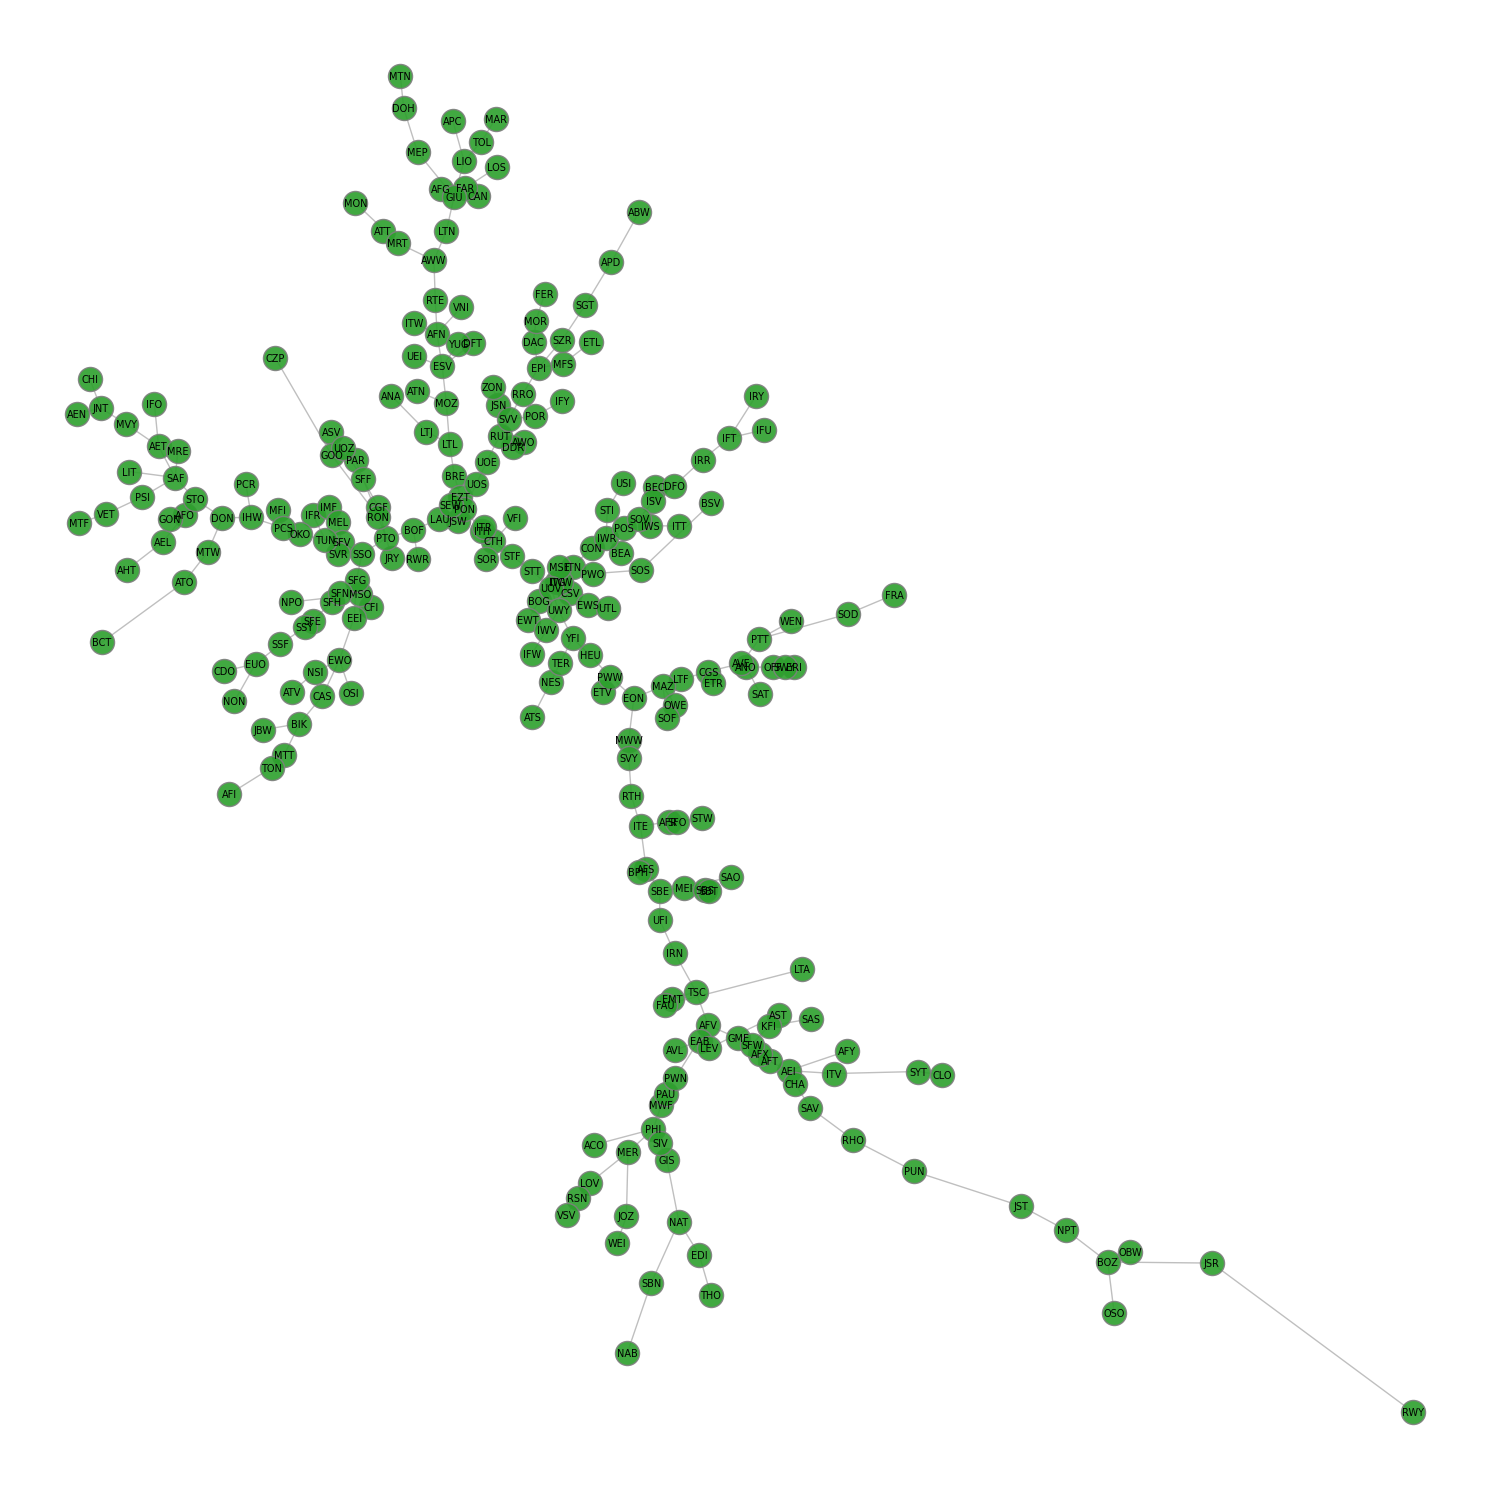

In [ ]:
L = 15
fig, ax = plt.subplots(figsize=(L, L))

pos = nx.kamada_kawai_layout(G)

options = {"edgecolors": "tab:gray", "node_size": 300, "alpha": 0.9}

nx.draw_networkx_nodes(G, pos, node_color="tab:green", **options)

for i, j in G.edges:
    xy = np.stack([pos[i], pos[j]])
    ax.plot(xy[:, 0], xy[:, 1], linewidth=1.0, color="#808080", alpha=0.5, zorder=-1)

labels = nx.get_node_attributes(G, 'zeo') 
nx.draw_networkx_labels(G, pos, labels, font_size=7)

plt.tight_layout()
plt.axis("off")

plt.show()

## Now using optimized positions after managing the graph by hand

In [6]:
pos = pd.read_csv("../data/graph-positions.csv", index_col=0)

In [7]:
posdict = dict(enumerate([tuple(xy) for xy in pos.values]))

nx.set_node_attributes(G, posdict, "pos")

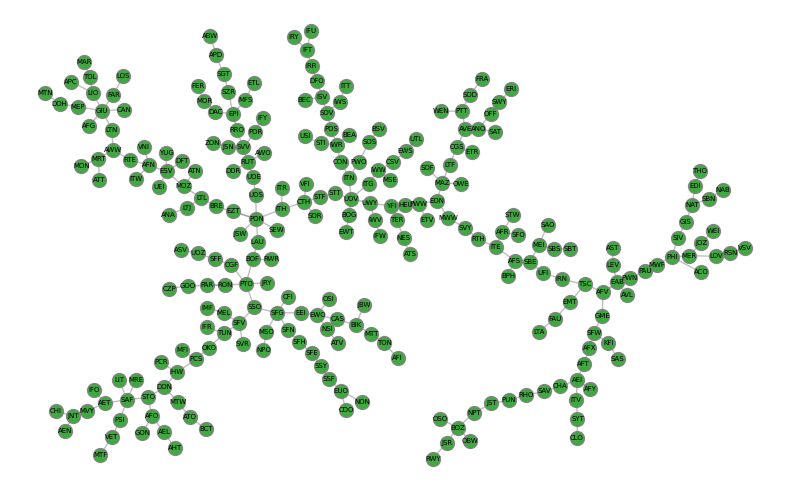

In [8]:
fig, ax = plt.subplots(figsize=(8, 5))

pos = nx.get_node_attributes(G, "pos")
labels = nx.get_node_attributes(G, "zeo") 

options = {"edgecolors": "tab:gray", "node_size": 100, "alpha": 0.9}

nx.draw_networkx_nodes(G, pos, node_color="tab:green", **options)

for i, j in G.edges:
    xy = np.stack([pos[i], pos[j]])
    ax.plot(xy[:, 0], xy[:, 1], linewidth=1.0, color="#808080", alpha=0.5, zorder=-1)

nx.draw_networkx_labels(G, pos, labels, font_size=5)

plt.tight_layout()
plt.axis("off")

fig.savefig("../figs/iza-mst.svg", bbox_inches="tight", transparent=True)
plt.show()

In [10]:
_G_FILE = "../data/iza-mst.pkl"
if not os.path.exists(_G_FILE):
    with open(_G_FILE, "wb") as f:
        pickle.dump(G, f)